In [71]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
#import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics

In [73]:
#import the Boston house price dataset 
house_price_df=pd.read_csv('boston.csv')

In [74]:
#let's view the first 5 rows of the dataset
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


from the dataset, we have:
- CRIM: Measures the crime rate per person in each town.
- ZN: The percentage of land in the town zoned for large residential lots (over 25,000 sq.ft).
- INDUS: The percentage of land used for non-retail businesses (e.g., factories, offices).
- CHAS: A binary variable indicating whether the property borders the Charles River.
- NOX: Measures air pollution (nitrogen oxide concentration).
- RM: The average number of rooms in homes in the area.
- AGE: The percentage of homes built before 1940.
- DIS: Measures how far the property is from major employment centers in Boston.
- RAD: Rates how easily accessible highways are from the property.
- TAX: The property tax rate per $10,000 of home value.
- PTRATIO: The ratio of students to teachers in local schools.
- B: Calculated as 1000*(Bk - 0.63)^2, where Bk is the percentage of Black residents.
- LSTAT: The percentage of residents classified as "lower status" (e.g., working-class, low income).
- MEDV: The median home price in the area (target variable for prediction). The "price" column equivalent.

In [75]:
#let's view the number of rows and columns of the dataset
house_price_df.shape

(506, 14)

In [76]:
#we'll check for missing values 
house_price_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [77]:
#let's check for some statistical measures of the dataset 
house_price_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


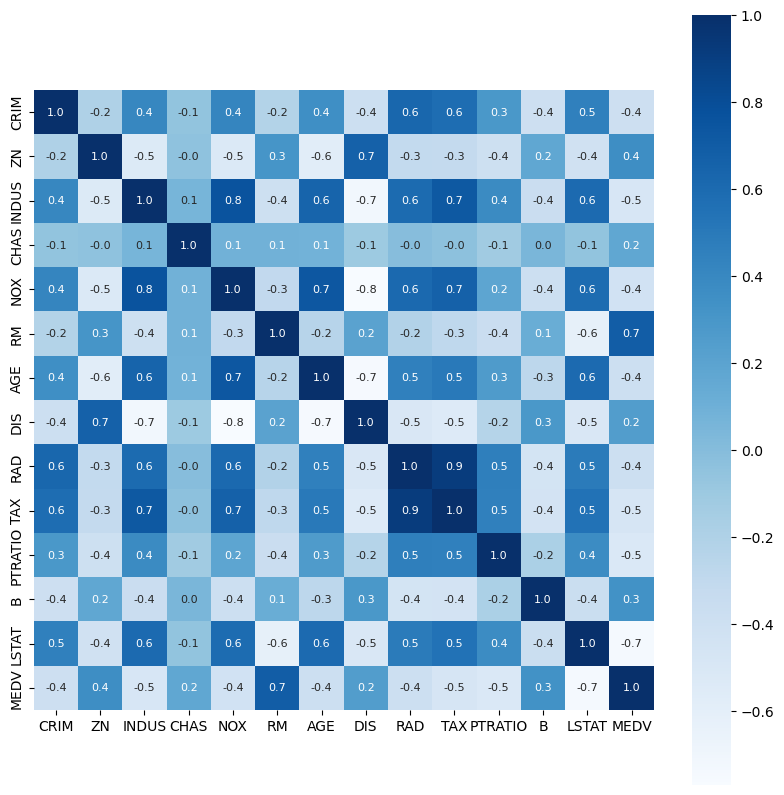

In [78]:
#next, we want to understand the correlation between various features in the dataset
correlation=house_price_df.corr()

#let's construct heatmap to understand the ccorrelation
plt.figure(figsize=(10,10))
sns.heatmap(
    correlation, 
    cbar=True, 
    square=True, 
    fmt='.1f', 
    annot=True, 
    annot_kws={'fontsize': 8},  
    cmap='Blues'
)
plt.show()

## Key Observations:
Strong Positive Correlations (Close to 1.0):
- TAX and RAD:
Correlation: 0.9 (likely row 9 and 10).
Interpretation: Areas with better highway access (RAD) tend to have higher property taxes (TAX). This is expected, as infrastructure often increases property value and taxes.

- INDUS and NOX:
Correlation: 0.8 (likely row 3 and 5).
Interpretation: Industrial areas (INDUS) are linked to higher pollution (NOX), which makes sense due to factory emissions.

- RM and MEDV:
Correlation: 0.7 (likely row 6 and 14).
Interpretation: Homes with more rooms (RM) tend to have higher prices (MEDV), a common real estate trend.

Strong Negative Correlations (Close to -1.0):
- DIS and NOX:
Correlation: -0.8 (likely row 5 and 8).
Interpretation: The farther a home is from employment centers (DIS), the lower the pollution (NOX). Suburbs vs. industrial areas.

- LSTAT and MEDV:
Correlation: -0.7 (likely row 14 and 15).
Interpretation: Neighborhoods with more lower-income residents (LSTAT) have lower home prices (MEDV).

- AGE and DIS:
Correlation: -0.7 (likely row 7 and 8).
Interpretation: Older homes (AGE) are closer to city centers/jobs (DIS), reflecting historical urban development.

In [79]:
#next, we'll split thr dataset into feature and target
X=house_price_df.drop(['MEDV'], axis=1)
y=house_price_df['MEDV']

In [80]:
#let's split the dataset into train and test data 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
#let's view number of data in X
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [82]:
#we'll train the model (XGBOOST Regressor). first, let's load the model 
model=XGBRegressor()

In [83]:
#let's train the model with X_train and y_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [85]:
#let's evaluate. 
#prediction on training data
#accuracy for prediction on training data
training_data_prediction=model.predict(X_train)
print(training_data_prediction)

[11.990929  19.915493  19.392988  13.408072  18.19098   24.603947
 21.08647   24.697266   8.70618   27.501347  20.708258  36.17404
 31.59529   11.69739   39.802494  13.893334  21.796898  23.695662
 17.590319  24.409176   8.799549  19.181791  25.278059  20.410582
 23.10783   37.90089   15.601625  45.400623  15.706774  22.599428
 14.514692  18.697655  17.797323  16.117708  20.609972  31.598558
 29.095152  15.600668  17.563873  22.51095   19.401443  19.287243
  8.4968405 20.607521  17.006351  17.093975  14.495169  49.98619
 14.284735  12.609954  28.688086  21.203852  19.306932  23.089056
 19.10372   25.004898  33.408142   4.992768  29.599434  18.685545
 21.707012  23.096918  22.802471  20.991085  48.796387  14.627051
 16.613852  27.075224  20.087227  19.794464  20.992268  41.290615
 23.175125  20.378569  18.558722  29.399414  36.40198   24.388987
 11.816533  13.792832  12.272116  17.794773  33.087368  26.73878
 13.393904  14.386449  50.004574  21.98985   19.906004  23.784376
 17.516703  1

In [87]:
#to evaluate this, we'll use evaluation metrics (R squared error)
score_1=metrics.r2_score(y_train, training_data_prediction)

#Mean Absolute Error (MAE)
score_2=metrics.mean_absolute_error(y_train, training_data_prediction)

print('R sqaured error: ',score_1)
print('Mean absolute error: ',score_2)

R sqaured error:  0.9999969829984965
Mean absolute error:  0.011182523717974735


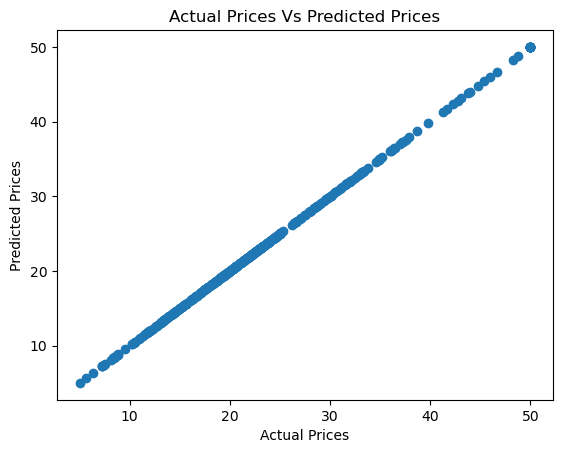

In [88]:
#let's visualize the actual Prices and Predicted prices 
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

In [89]:
#prediction on test data
#accuracy for prediction on test data
test_data_prediction=model.predict(X_test)
print(test_data_prediction)

[24.276764  30.46075   17.959005  22.965069  17.133715  22.163433
 18.669397  15.236069  21.046127  20.459925  22.439089  18.89959
 11.203732  21.811333  18.655327  26.25912   21.139784   9.210471
 47.378334  15.913627  25.087412  26.079153  13.452615  21.082066
 15.193554  15.992098  20.690847  13.094459  21.131876  21.168287
 18.848736  23.033901  14.877705  21.35931   15.263533  14.96528
 33.754707  19.01804   22.69863   24.285683  19.455326  27.735622
 47.043087  19.217285  21.663893  14.770664  13.908811  23.762539
 17.538256  25.872328  22.392021  35.081337  17.318087  27.144457
 45.176407  21.917618  16.05219   30.757784  22.377308  19.42954
 25.34448   34.943123  30.451046  17.93282   25.573687  17.035986
 14.910609  22.595358  27.416218  14.8786125 20.446955  30.664629
  9.616146  21.455444  22.940966   6.722242  19.879969  46.798008
  9.669527  13.117878  21.28643   11.787285  21.489807   8.746218
 19.149298  27.94858   15.95009   23.537941  23.592808  18.32834
 22.520878   8

In [90]:
#to evaluate this, we'll use evaluation metrics (R squared error)
score_1=metrics.r2_score(y_test, test_data_prediction)

#Mean Absolute Error (MAE)
score_2=metrics.mean_absolute_error(y_test, test_data_prediction)

print('R sqaured error: ',score_1)
print('Mean absolute error: ',score_2)

R sqaured error:  0.9057837838492537
Mean absolute error:  1.8908873698290656


In [93]:
# Save the model to a file
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)